In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
import statsmodels
from statsmodels.stats.diagnostic import breaks_cusumolsresid

plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False   # 步骤二（解决坐标轴负数的负号显示问题）

In [28]:
# 加载数据
df = pd.read_csv("../data/居民-消费指数.csv", header=2)
df_reversed = df[::-1].reset_index(drop=True)
df_reversed = df_reversed.iloc[3:, :]  # 原数据时间颠倒
df_reversed

,时间,居民消费价格指数,食品烟酒类居民消费价格指数,衣着类居民消费价格指数,居住类居民消费价格指数,生活用品及服务类居民消费价格指数,交通和通信类居民消费价格指数,教育文化和娱乐类居民消费价格指数,医疗保健类居民消费价格指数,其他用品和服务类居民消费价格指数
3,2016年1月,101.8,103.6,101.9,101.4,100.6,98.4,101.7,102.9,99.6
4,2016年2月,102.3,105.8,101.6,101.3,100.3,98.4,100.9,102.8,100.4
5,2016年3月,102.3,106.0,101.5,101.3,100.4,97.4,101.2,103.1,101.7
6,2016年4月,102.3,105.9,101.5,101.4,100.5,97.6,101.2,103.2,101.7
7,2016年5月,102.0,104.7,101.5,101.6,100.6,97.4,101.2,103.5,102.2
...,...,...,...,...,...,...,...,...,...,...
101,2024年3月,100.1,98.6,101.6,100.2,101.0,98.7,101.8,101.5,102.7
102,2024年4月,100.3,98.6,101.6,100.2,101.4,100.1,101.8,101.6,103.8
103,2024年5月,100.3,99.0,101.6,100.2,100.8,99.8,101.7,101.5,103.6
104,2024年6月,100.2,98.9,101.5,100.2,100.9,99.7,101.7,101.5,104.0


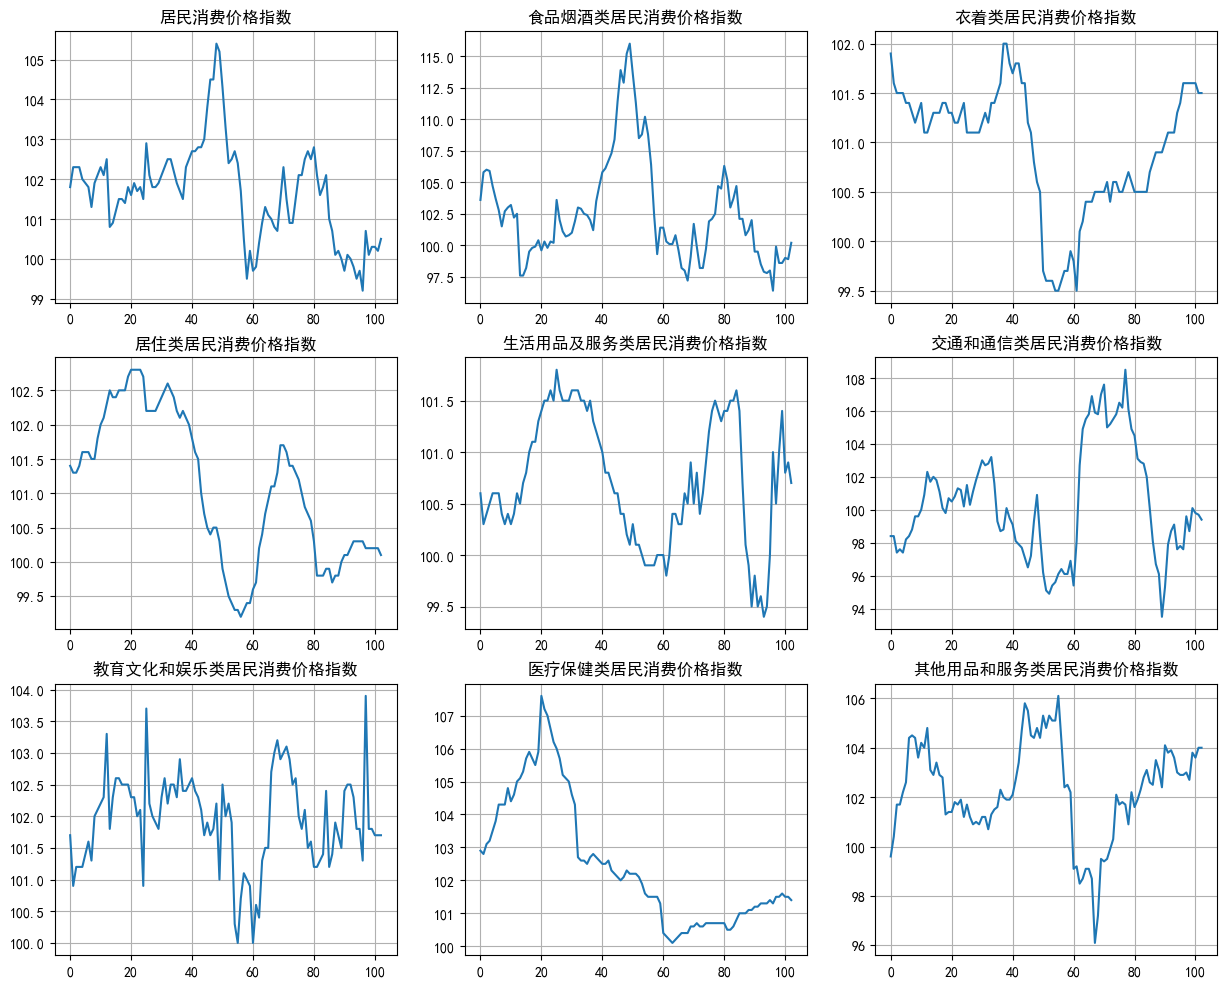

In [29]:
# 绘制各价格指数的折线序列图
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
x = np.arange(len(df_reversed["时间"]))
col_names = df_reversed.columns.tolist()

for i in range(3):
    for j in range(3):
        axes[i, j].plot(x, df_reversed.iloc[:, 3*i+j+1])
        axes[i, j].set_title(col_names[3*i+j+1])
        axes[i, j].grid(True)

plt.savefig("../imgs/各折线序列图汇总.png")
plt.show()

In [30]:
# VAR模型要求数据平稳
# 进行数据平稳性检验——ADF
df_diff = df_reversed.copy()
col_dict = {
    f"{col_names[1]}": 0,
    f"{col_names[2]}": 0,
    f"{col_names[3]}": 0,
    f"{col_names[4]}": 0,
    f"{col_names[5]}": 0,
    f"{col_names[6]}": 0,
    f"{col_names[7]}": 0,
    f"{col_names[8]}": 0,
    f"{col_names[9]}": 0,
}

for i in range(1, 10):
    res = adfuller(df_reversed.iloc[:, i])
    print(f"{col_names[i]}ADF检验结果: {res}")
    if res[0] < res[4]["5%"]:
        print("原序列平稳")
    else:
        print("原序列不平稳")
        # 差分处理
        diff = df_reversed.iloc[:, i].copy()
        
        for j in range(1, 10): # 最大9次差分
            diff = np.diff(diff)
            res_diff = adfuller(diff)
            if res_diff[0] < res_diff[4]["5%"]:
                print(f"{j}阶差分后原序列平稳")
                col_dict[f"{col_names[i]}"] = list(diff)[:101]
                break
        

居民消费价格指数ADF检验结果: (-1.1701670114605809, 0.6862956911957443, 13, 89, {'1%': -3.506057133647011, '5%': -2.8946066061911946, '10%': -2.5844100201994697}, 110.6433699195967)
原序列不平稳
1阶差分后原序列平稳
食品烟酒类居民消费价格指数ADF检验结果: (-1.8982012120115588, 0.3329077899821232, 13, 89, {'1%': -3.506057133647011, '5%': -2.8946066061911946, '10%': -2.5844100201994697}, 273.719700426284)
原序列不平稳
1阶差分后原序列平稳
衣着类居民消费价格指数ADF检验结果: (-1.5809183968681, 0.4931713397619128, 12, 90, {'1%': -3.505190196159122, '5%': -2.894232085048011, '10%': -2.5842101234567902}, -80.99023710935009)
原序列不平稳
1阶差分后原序列平稳
居住类居民消费价格指数ADF检验结果: (-1.0630755813297421, 0.7295701648494559, 12, 90, {'1%': -3.505190196159122, '5%': -2.894232085048011, '10%': -2.5842101234567902}, -94.99708579631167)
原序列不平稳
1阶差分后原序列平稳
生活用品及服务类居民消费价格指数ADF检验结果: (-2.731739834617318, 0.06870508072204133, 3, 99, {'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}, 4.284135036298693)
原序列不平稳
1阶差分后原序列平稳
交通和通信类居民消费价格指数ADF检验结果: (-2.1108993569852235, 0.24015

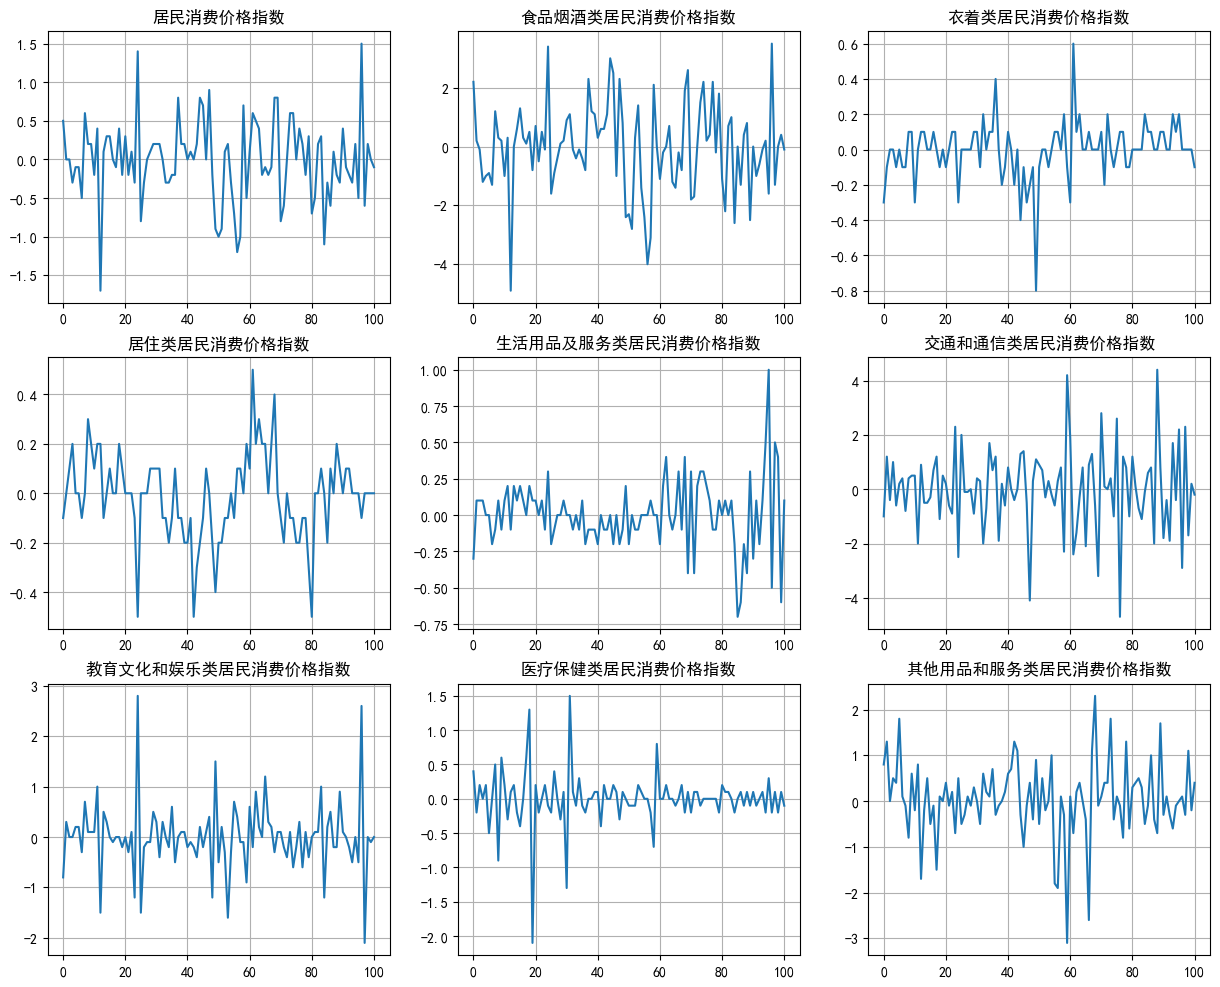

In [31]:
# 差分数据处理
df_diff = pd.DataFrame(col_dict)

# 子图绘制
fig, axes = plt.subplots(3, 3, figsize=(15, 12))


for i in range(3):
    for j in range(3):
        x = np.arange(len(col_dict[f"{col_names[3*i+j+1]}"]))
        axes[i, j].plot(x, col_dict[f"{col_names[3*i+j+1]}"])
        axes[i, j].set_title(col_names[3*i+j+1])
        axes[i, j].grid(True)

plt.savefig("../imgs/各折线序列差分图汇总.png")
plt.show()

In [32]:
# 协整：用于确定多个非平稳时间序列之间的长期稳定关系。即使这些时间序列单独看是非平稳的，它们的某些线性组合可能是平稳的。
# 协整检验目的：防止伪回归现象出现，否则格兰杰因果检验就失去了意义
# 对于不平稳的序列，可以通过差分使其平稳，但是会失去总量的长期信息，而这些信息对分析问题又是必要的，所以用协整来解决此问题
# 对VAR模型的数据要求降低，要求数据协整即可 (不用差分)
for i in range(1, 10):
    for j in range(1, 10):
        if i == j:
            break
        else:
            result = statsmodels.tsa.stattools.coint(df_reversed.iloc[:, i], df_reversed.iloc[:, j], trend="c")  # 基本没有线性趋势
            if result[0] < list(result[2])[1]:
                print(f"有95%的把握证明  索引{i} {col_names[i]}  和  索引{j} {col_names[j]}  协整")


有95%的把握证明  索引5 生活用品及服务类居民消费价格指数  和  索引4 居住类居民消费价格指数  协整
有95%的把握证明  索引7 教育文化和娱乐类居民消费价格指数  和  索引5 生活用品及服务类居民消费价格指数  协整
有95%的把握证明  索引9 其他用品和服务类居民消费价格指数  和  索引6 交通和通信类居民消费价格指数  协整


In [118]:
# 方法一：使用差分直接进行VAR模型
# AIC和BIC定阶
# VAR模型拟合
# model = VAR(df_diff)
# results = model.fit(maxlags=1)  # 小样本数据，更倾向于使用BIC，惩罚模型复杂度
# resid = results.resid  # 模型残差
# print(resid)

# print(0.5*results.aic+0.5*results.bic)
# print(results.bic)
# print(results.summary())

     居民消费价格指数(上年同月=100)  食品烟酒类居民消费价格指数(上年同月=100)  衣着类居民消费价格指数(上年同月=100)  \
1              0.019061                -0.404686               0.031660   
2             -0.063695                -0.325426               0.011251   
3             -0.214939                -0.972694              -0.023300   
4             -0.249437                -0.971999              -0.149718   
5             -0.162344                -0.865048              -0.051460   
..                  ...                      ...                    ...   
96             0.947107                 2.667471              -0.025177   
97            -0.015733                -0.018476              -0.083546   
98            -0.594890                -1.620375               0.112723   
99            -0.066842                -0.338659              -0.023193   
100            0.060906                 0.403890              -0.073013   

     居住类居民消费价格指数(上年同月=100)  生活用品及服务类居民消费价格指数(上年同月=100)  \
1                 0.153280               

In [33]:
# 方法二：使用协整数据直接进行VAR模型
# AIC和BIC定阶

def deter_order(data):
    aic = []
    bic = []
    fpe = []
    hqic = []
    var_model = VAR(data)
    
    for i in range(1, 10): # 9次阶数
        var_result = var_model.fit(maxlags=i)
        aic.append(var_result.aic)
        bic.append(var_result.bic)
        fpe.append(var_result.fpe)
        hqic.append(var_result.hqic)
        
    print(f"AIC准则确定的滞后阶数为{aic.index(min(aic)) + 1}")
    print(f"BIC准则确定的滞后阶数为{bic.index(min(bic)) + 1}")
    print(f"FPE准则确定的滞后阶数为{aic.index(min(aic)) + 1}")
    print(f"HQIC准则确定的滞后阶数为{bic.index(min(bic)) + 1}")

"""2个变量部分"""
df_54 = pd.DataFrame({f"{col_names[5]}": df_reversed.iloc[:, 5], f"{col_names[4]}": df_reversed.iloc[:, 4]})
df_75 = pd.DataFrame({f"{col_names[7]}": df_reversed.iloc[:, 7], f"{col_names[5]}": df_reversed.iloc[:, 5]})
df_96 = pd.DataFrame({f"{col_names[9]}": df_reversed.iloc[:, 9], f"{col_names[6]}": df_reversed.iloc[:, 6]})

# 5、4索引(通过aic和bic定阶，为2)
results_54 = deter_order(df_54)
# print(results_54.summary())

# 7、5索引(通过aic和bic定阶，为)
results_75 = deter_order(df_75)
# print(results_75.summary())

# 9、6索引(通过aic和bic定阶，为2)
results_96 = deter_order(df_96)
# print(results_96.summary())


"""3个变量部分"""




AIC准则确定的滞后阶数为2
BIC准则确定的滞后阶数为2
FPE准则确定的滞后阶数为2
HQIC准则确定的滞后阶数为2
AIC准则确定的滞后阶数为2
BIC准则确定的滞后阶数为1
FPE准则确定的滞后阶数为2
HQIC准则确定的滞后阶数为1
AIC准则确定的滞后阶数为6
BIC准则确定的滞后阶数为2
FPE准则确定的滞后阶数为6
HQIC准则确定的滞后阶数为2


'3个变量部分'

In [34]:
"""根据定阶结果拟合VAR模型"""
var_54 = VAR(df_54)
var_54_res = var_54.fit(maxlags=2)
cusum_54 = breaks_cusumolsresid(var_54_res.resid.to_numpy())
print(cusum_54)

var_75 = VAR(df_75)
var_75_res = var_75.fit(maxlags=2)
cusum_75 = breaks_cusumolsresid(var_75_res.resid.to_numpy())
print(cusum_75)

var_96 = VAR(df_96)
var_96_res = var_96.fit(maxlags=6)
cusum_96 = breaks_cusumolsresid(var_96_res.resid.to_numpy())
print(cusum_96)


(0.8234557526260601, 0.5064937978672134, [(1, 1.63), (5, 1.36), (10, 1.22)])
(0.781225668629176, 0.5749680938935684, [(1, 1.63), (5, 1.36), (10, 1.22)])
(0.7547890946043236, 0.6191105878733653, [(1, 1.63), (5, 1.36), (10, 1.22)])


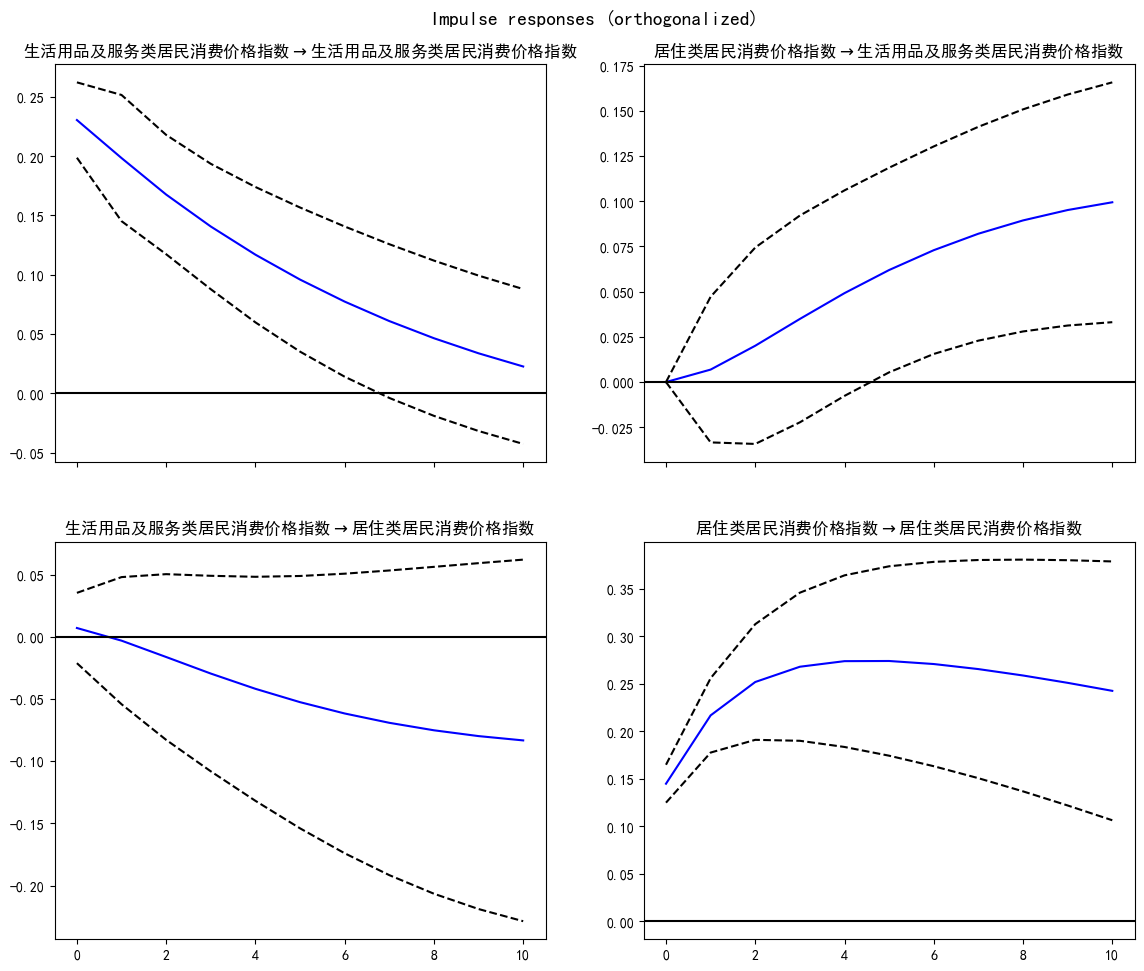

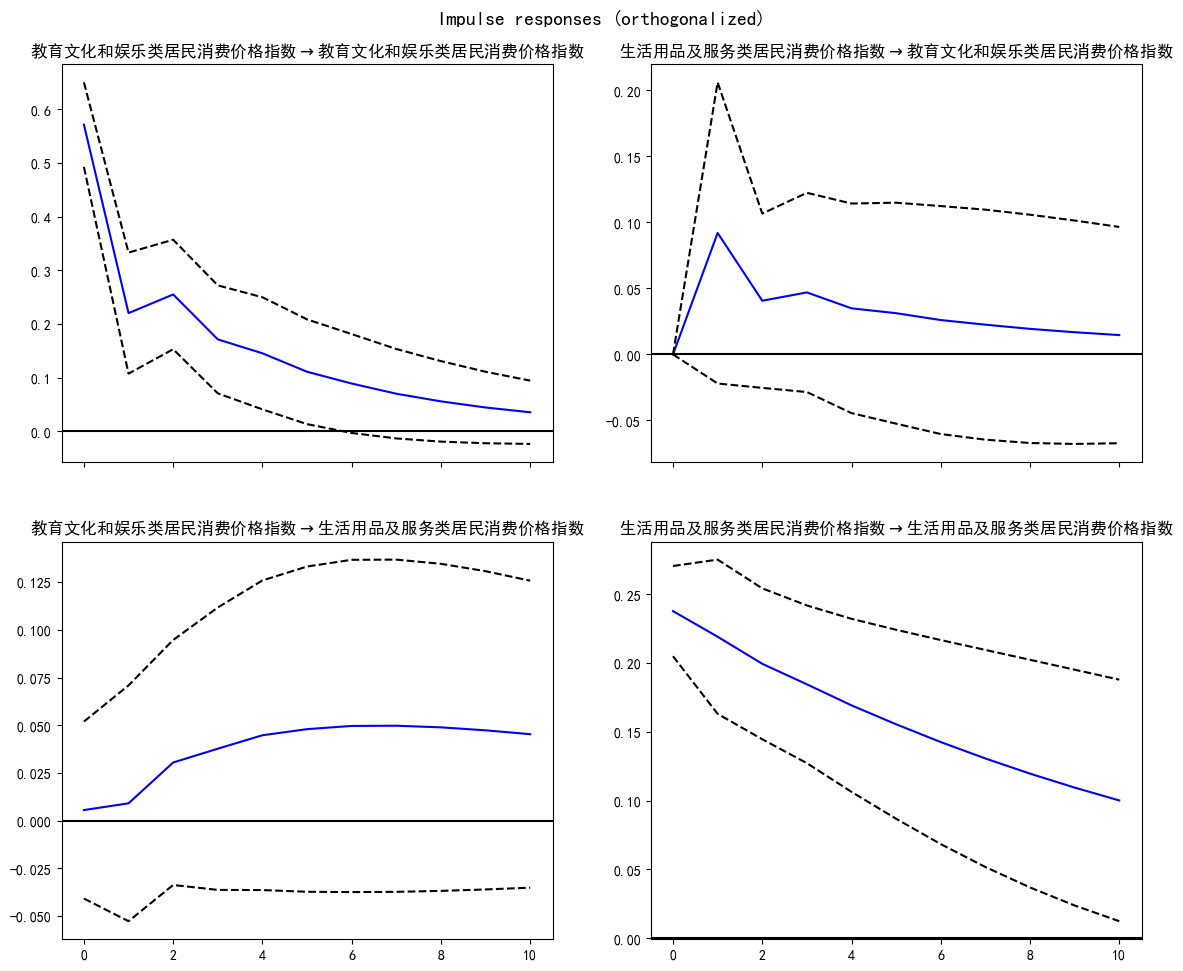

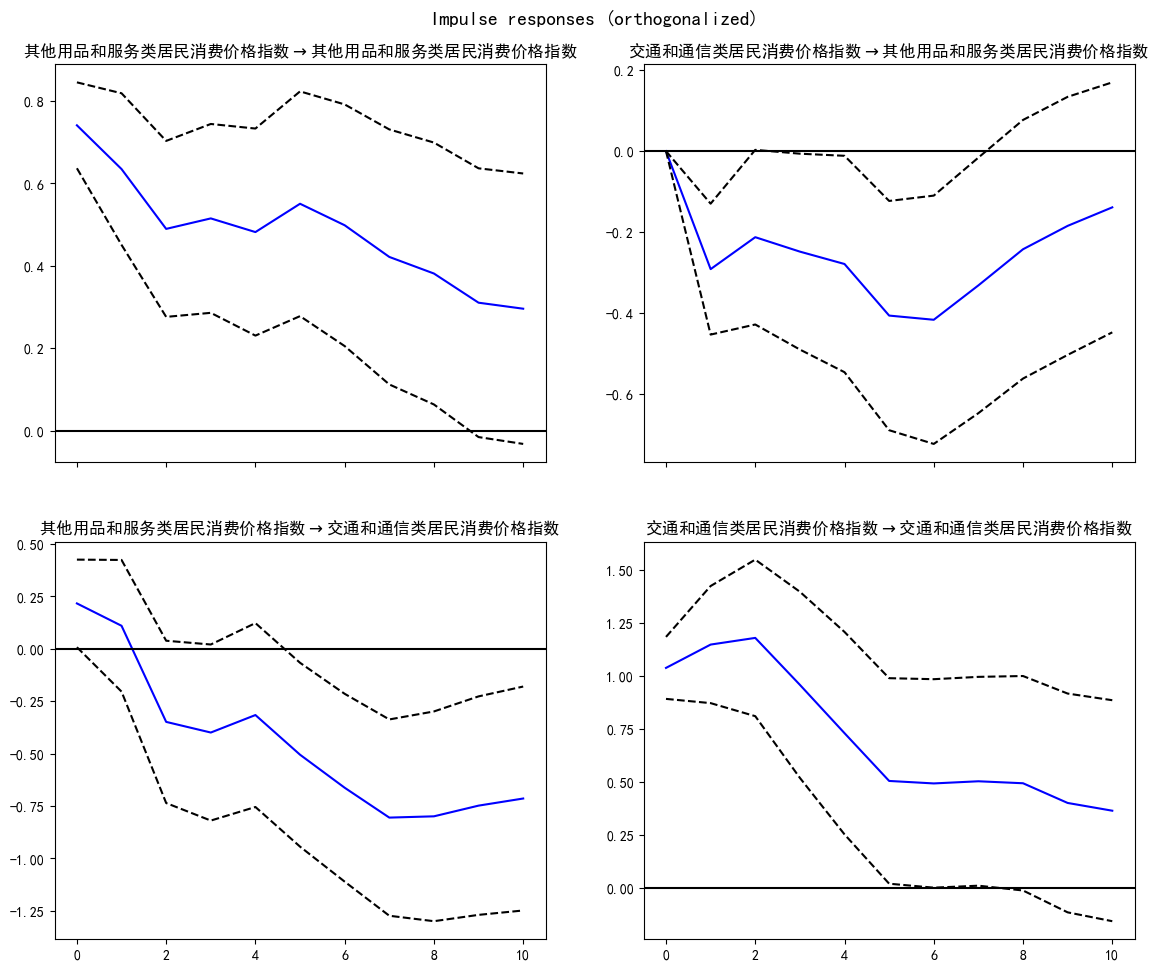

In [65]:
"""绘制脉冲响应图"""
irf_54 = var_54_res.irf(10)  # 绘制10个时间步的图像
irf_54.plot(orth=True, figsize=(12, 10))
plt.savefig("../imgs/irf_54.jpg")
plt.show()

irf_75 = var_75_res.irf(10)  # 绘制10个时间步的图像
irf_75.plot(orth=True, figsize=(12, 10))
plt.savefig("../imgs/irf_75.jpg")
plt.show()

irf_96 = var_96_res.irf(10)  # 绘制10个时间步的图像
irf_96.plot(orth=True, figsize=(12, 10))
plt.savefig("../imgs/irf_96.jpg")
plt.show()


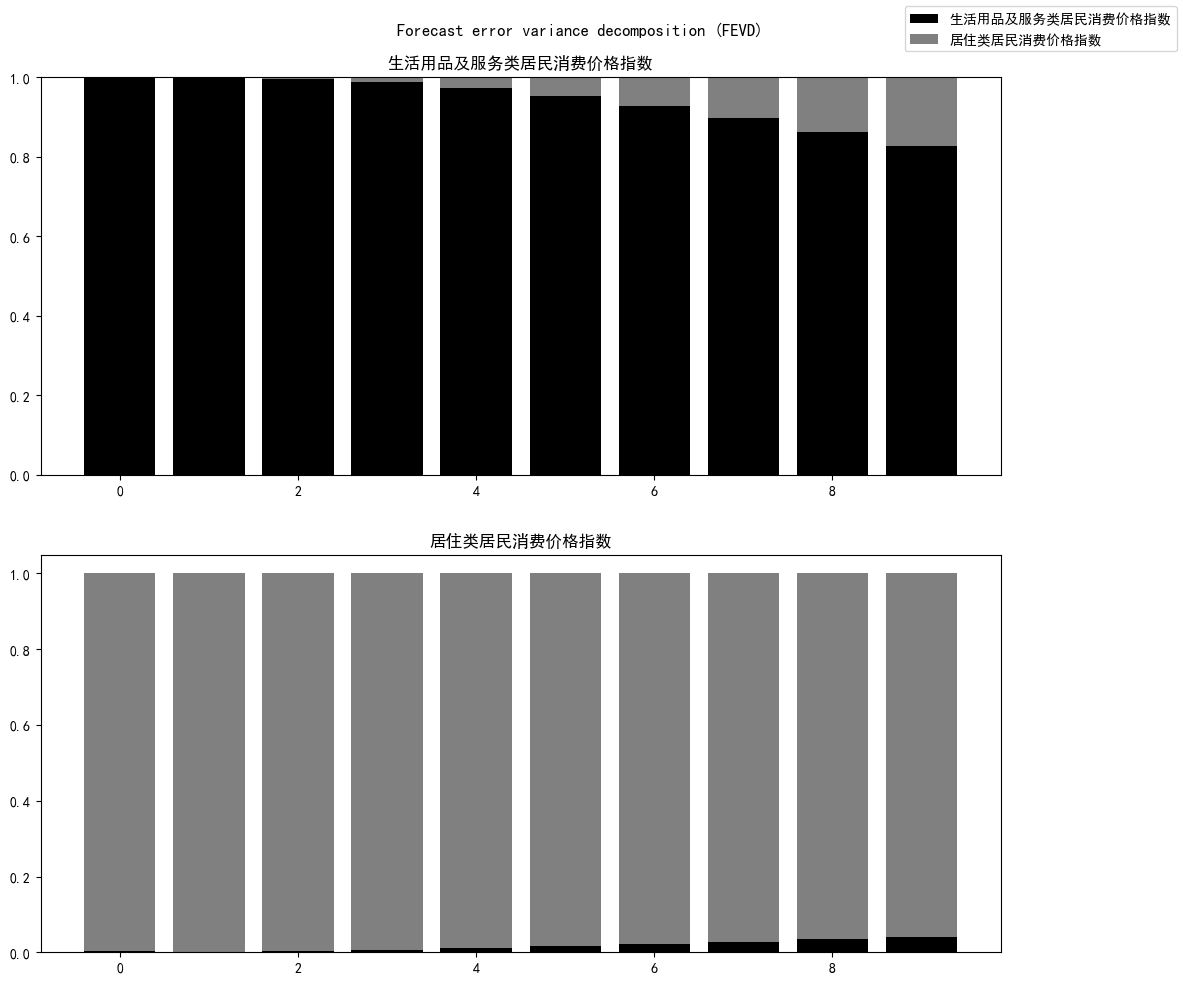

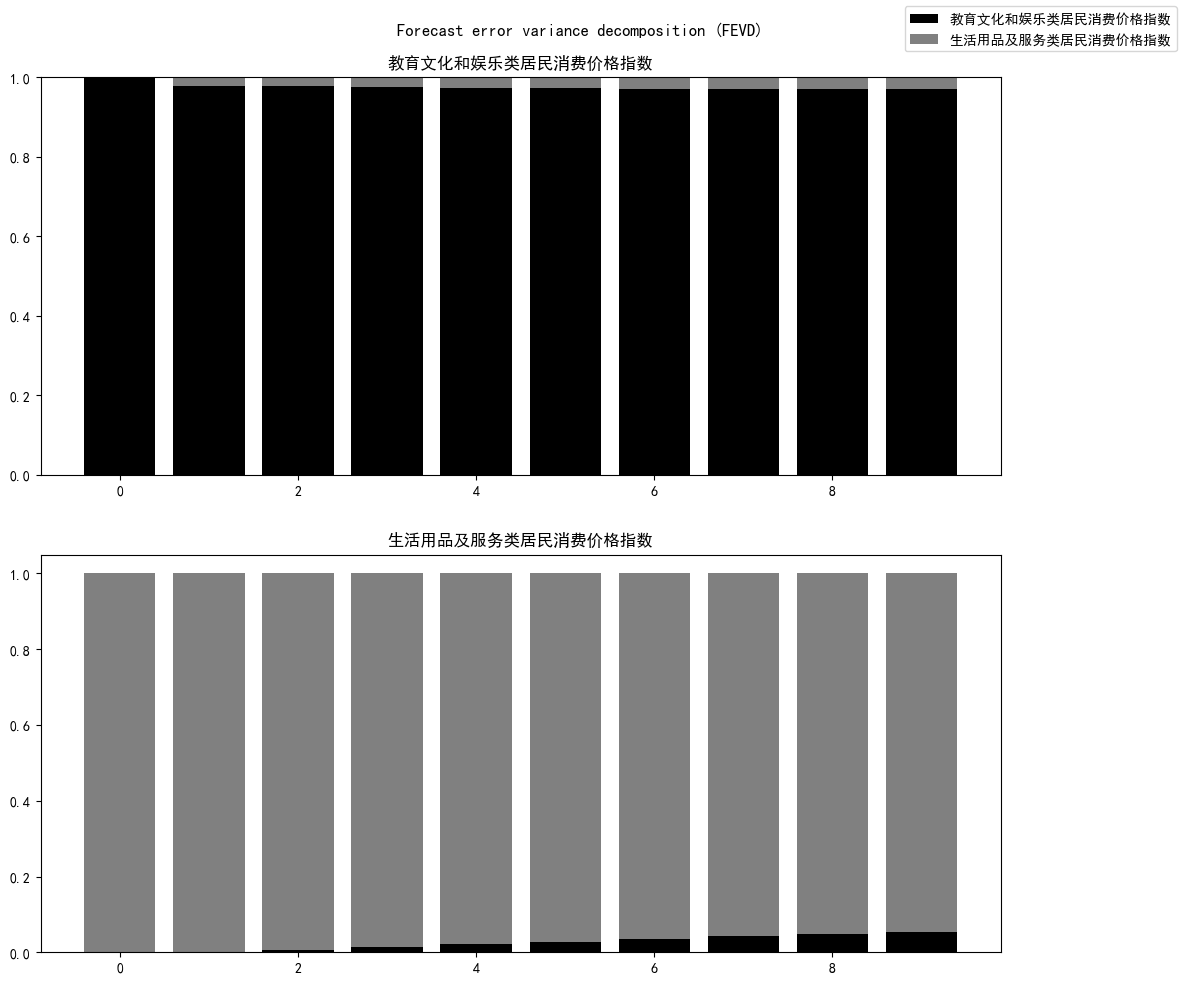

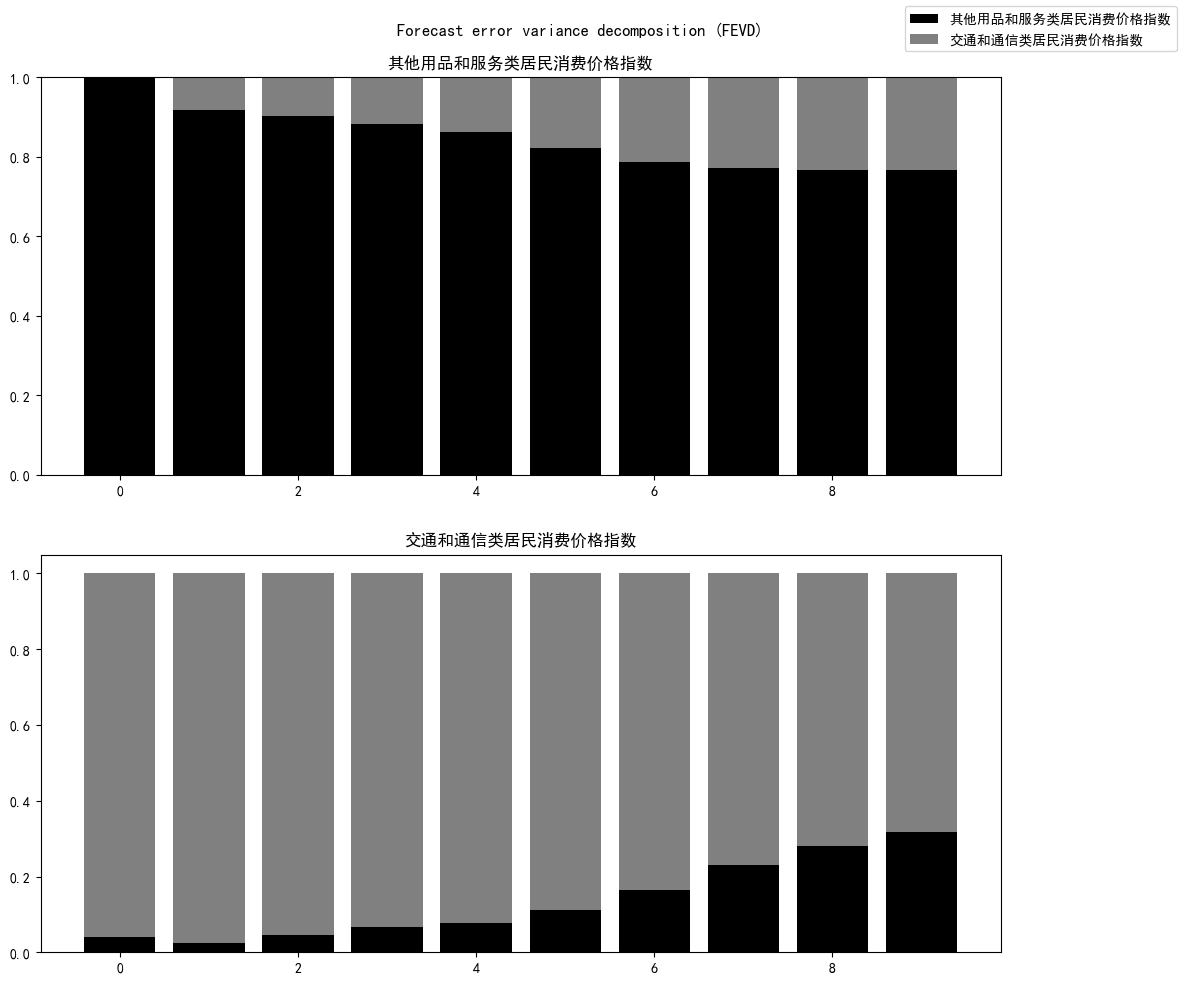

In [57]:
"""绘制方差分解图"""
fevd_54 = var_54_res.fevd(10)
fevd_54.plot(figsize=(12, 10))
plt.savefig("../imgs/fevd_54.jpg")
plt.show()

fevd_75 = var_75_res.fevd(10)
fevd_75.plot(figsize=(12, 10))
plt.savefig("../imgs/fevd_75.jpg")
plt.show()

fevd_96 = var_96_res.fevd(10)
fevd_96.plot(figsize=(12, 10))
plt.savefig("../imgs/fevd_96.jpg")
plt.show()

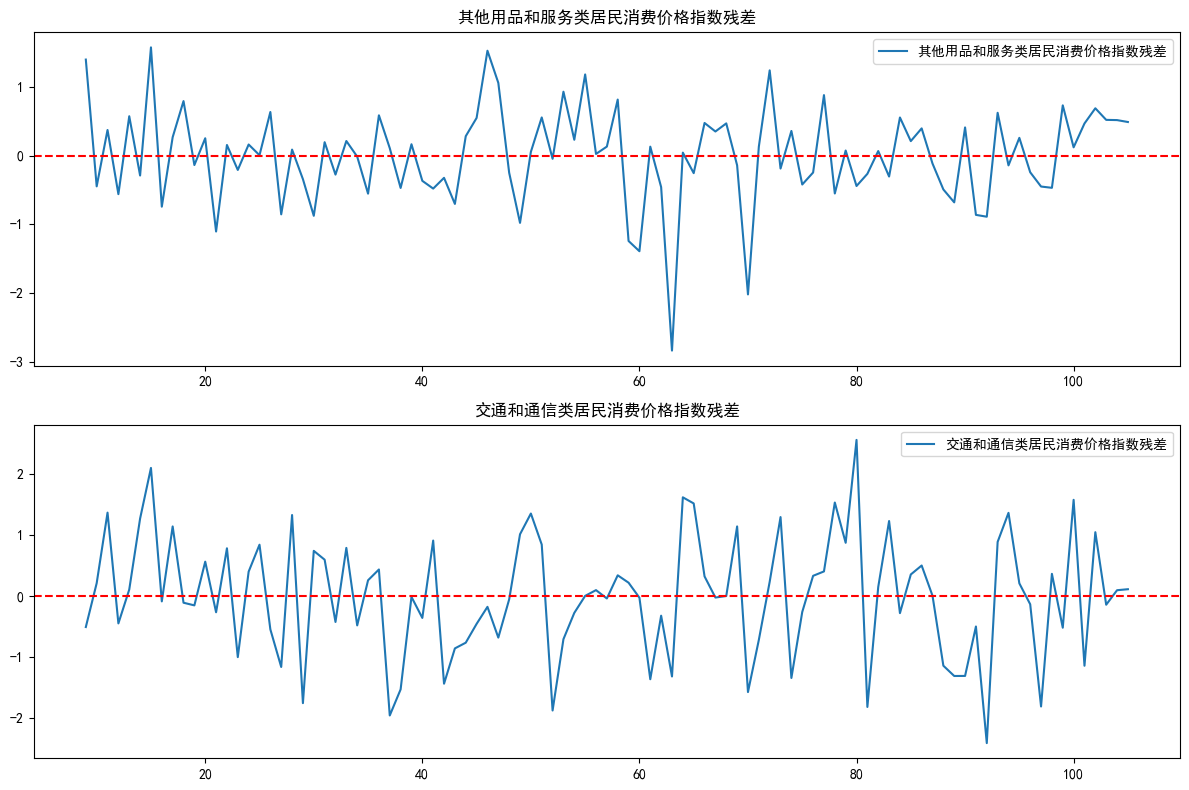

In [68]:
"""残差图的绘制"""
resid_96 = var_96_res.resid
plt.figure(figsize=(12, 8))

for i, col in enumerate(resid_96.columns):
    plt.subplot(len(resid_96.columns), 1, i + 1)
    plt.plot(resid_96[col], label=f'{col}残差')
    plt.title(f'{col}残差')
    plt.axhline(0, color='red', linestyle='--')
    plt.legend()
    if i == 1:
        plt.savefig(f"../imgs/resid_96.jpg")

plt.tight_layout()
plt.show()